# CellMCD

In this notebook we analyze the covariance of the TopGear dataset using the cellwise minimum covariance determinant which can handle NAs.

## Imports

In [9]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

from robpy.datasets import load_topgear
from robpy.preprocessing import DataCleaner
from robpy.covariance.cellmcd import CellMCD

%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


## Load and preprocess the data

To preprocess the data, we run `DataCleaner`, as this should always be done before the cellwise analysis. We additionally remove the variable `Verdict` and take log-transforms of the skewed variables.

In [10]:
data = load_topgear(as_frame=True)
car_models = data.data['Make'] + data.data['Model']

cleaner = DataCleaner().fit(data.data)
clean_data = cleaner.transform(data.data)
clean_data = clean_data.drop(columns=['Verdict'])
for col in ['Displacement', 'BHP', 'Torque', 'TopSpeed']:
    clean_data[col] = np.log(clean_data[col])
clean_data['Price'] = np.log(clean_data['Price']/1000)

car_models.drop(cleaner.dropped_rows["rows_missings"],inplace=True)
car_models = car_models.tolist()
clean_data.head()

,Price,Displacement,BHP,Torque,Acceleration,TopSpeed,MPG,Weight,Length,Width,Height
0,3.056357,7.376508,4.653960,5.463832,11.3,4.744932,64.0,1385.0,4351.0,1798.0,1465.0
1,2.718331,7.221105,4.653960,4.553877,10.7,4.753590,49.0,1090.0,4063.0,1720.0,1446.0
2,3.433826,7.192182,4.584967,4.521789,11.8,4.663439,56.0,988.0,3078.0,1680.0,1500.0
3,4.882764,8.688622,6.248043,6.124683,4.6,5.209486,19.0,1785.0,4720.0,NaN,1282.0
4,4.955792,8.688622,6.248043,6.124683,4.6,5.209486,19.0,1890.0,4720.0,NaN,1282.0


## CellMCD

In [11]:
cellmcd = CellMCD()
cellmcd.fit(clean_data.values)

CellMCD()

We focus on the variable `Price` and make several diagnostic plots.

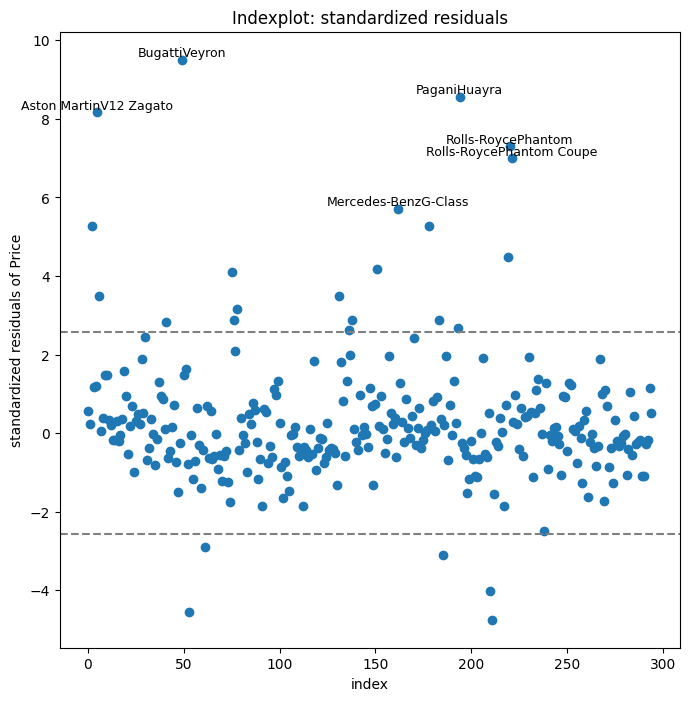

In [12]:
variable = 0
variable_name = "Price"
cellmcd.cell_MCD_plot(
    variable=variable,
    variable_name=variable_name,
    row_names=car_models,
    plottype="indexplot",
    annotation_quantile=0.9999999
)
plt.show()

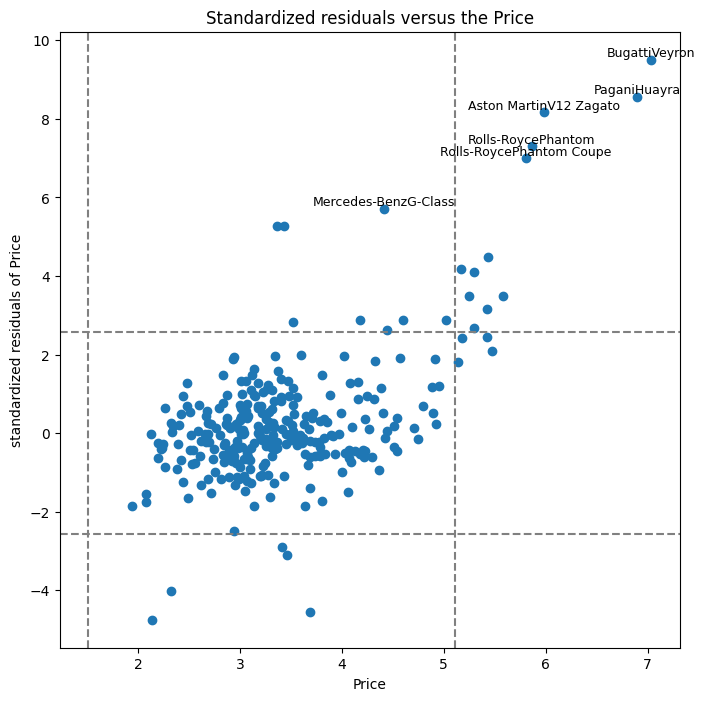

In [13]:
cellmcd.cell_MCD_plot(
    variable=variable,
    variable_name=variable_name,
    row_names=car_models,
    plottype="residuals_vs_variable",
    annotation_quantile=0.9999999
)
plt.show()

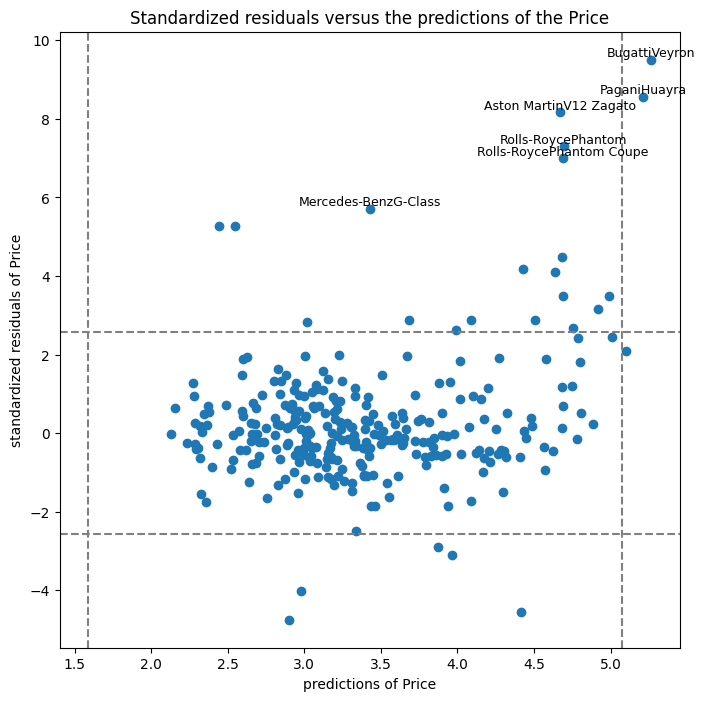

In [14]:
cellmcd.cell_MCD_plot(
    variable=variable,
    variable_name=variable_name,
    row_names=car_models,
    plottype="residuals_vs_predictions",
    annotation_quantile=0.9999999
)
plt.show()

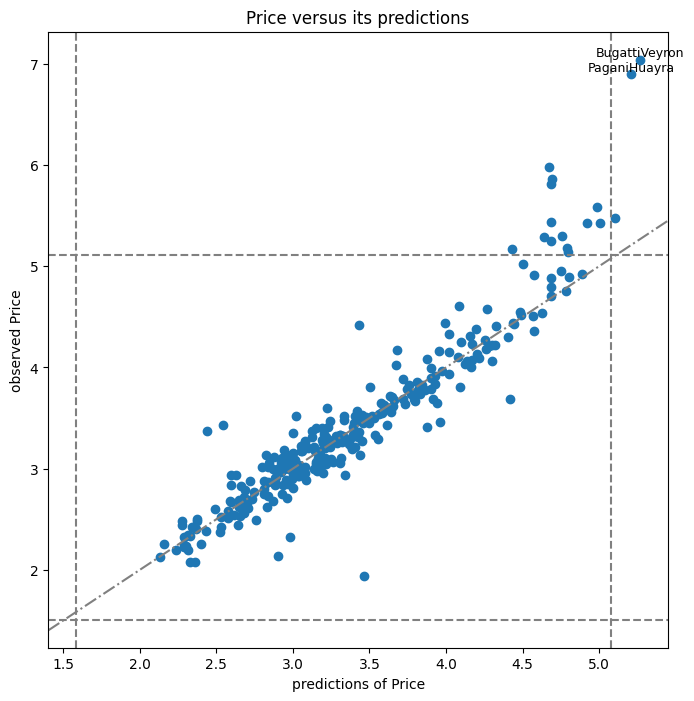

In [15]:
cellmcd.cell_MCD_plot(
    variable=variable,
    variable_name=variable_name,
    row_names=car_models,
    plottype="variable_vs_predictions",
    annotation_quantile=0.99999
)
plt.show()

Next we look at the interaction between the variable `Price` and the variable `Acceleration`.

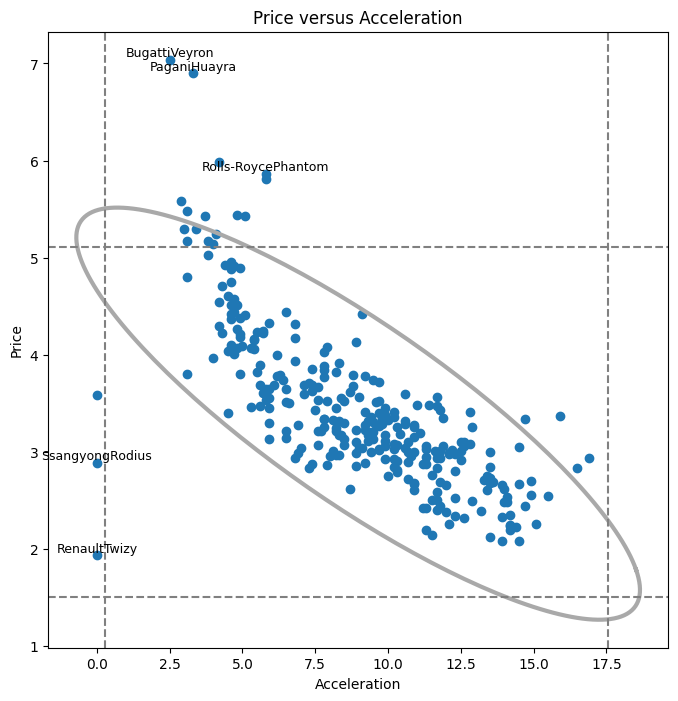

In [16]:
second_variable = 4
second_variable_name = "Acceleration"
cellmcd.cell_MCD_plot(
    second_variable,second_variable_name,car_models,variable,variable_name,"bivariate",
    annotation_quantile=0.999999
)
plt.show()